In [1]:
import numpy as np
# import matplotlib.pyplot as plt

from mlib import *

In [3]:
old_df = mio.load('ref/normalized_df.pkl')

In [4]:
old_df

,S2A_SR_AV_B1,S2A_SR_AV_B2,S2A_SR_AV_B3,S2A_SR_AV_B4,S2A_SR_AV_B5,S2A_SR_AV_B6,S2A_SR_AV_B7,S2A_SR_AV_B8,S2A_SR_AV_B8A,S2A_SR_AV_B9,S2A_SR_AV_B10,S2A_SR_AV_B11,S2A_SR_AV_B12
SR_WL,,,,,,,,,,,,,
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df = old_df
for col in old_df.columns:
    df[col] = old_df[col] / old_df[col].sum()

In [8]:
df['S2A_SR_AV_B1'].sum()

1.0

In [9]:
mio.save(df, 'ref/sen_norm_df.pkl')

In [91]:
x = []
y = []
y_norm = []

half_T = 24
band_num = 31
start_wv = 400
space = 20

for i in range(band_num):
    start = start_wv + space*i - half_T/2
    x.append(np.arange(start, start+half_T+1))
    y.append(np.sin((x[-1]-start)/(half_T/np.pi)))
    y_norm.append(y[-1]/sum(y[-1]))

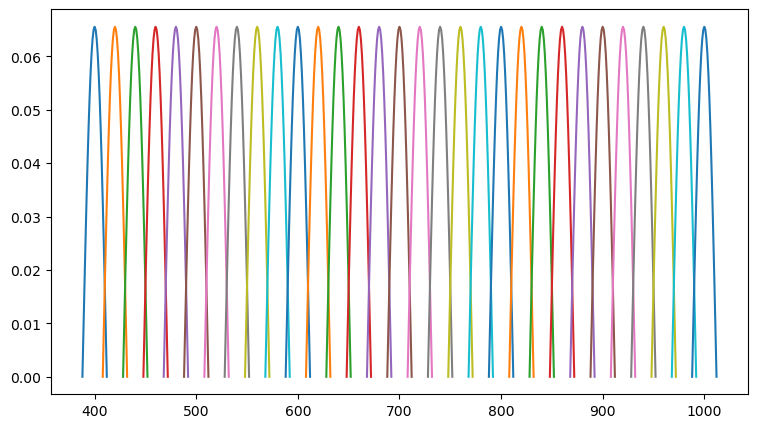

In [92]:
fig = plt.figure(figsize=(9,5))
for i in range(len(x)):
    plt.plot(x[i],y_norm[i])
plt.show(fig)

In [130]:
len(range(288,913))

625

In [131]:
y_norm_all = {}
start = 388
end = 1012
length = len(range(start, end+1))
for i, val in enumerate(y_norm):
    name = f'Band_{i}'
    y_norm_all[name] = np.zeros(length)
    y_norm_all[name][int(x[i][0]-start):int(x[i][0]-start+len(val))] = val

In [132]:
df_new = pd.DataFrame(y_norm_all, index=[i for i in range(start, end+1)])

In [133]:
df_new

,Band_0,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,...,Band_21,Band_22,Band_23,Band_24,Band_25,Band_26,Band_27,Band_28,Band_29,Band_30
388,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
389,0.008555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
390,0.016964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
391,0.025082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
392,0.032772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.277173e-02
1009,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.508240e-02
1010,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.696390e-02
1011,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.555139e-03


In [134]:
mio.dump(df_new, 'ideal_norm_df.pkl')

In [103]:
df_new.first_valid_index()

388

In [109]:
Xresampled = np.arange(df_new.first_valid_index(), df_new.last_valid_index()+0.5, 0.5)
print(Xresampled)

[ 388.   388.5  389.  ... 1011.  1011.5 1012. ]


In [107]:
df_resampled = df_new.reindex(df_new.index.union(Xresampled)).interpolate('values').loc[Xresampled]

In [108]:
df_resampled.head()

,Band_0,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,...,Band_21,Band_22,Band_23,Band_24,Band_25,Band_26,Band_27,Band_28,Band_29,Band_30
388.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388.5,0.004278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389.0,0.008555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389.5,0.012760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
390.0,0.016964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
img=mio.load(r'generated_images\voronoi1024_1\voronoi1024_1_8x.pkl')

In [127]:
img.max()

1.0647527847652682

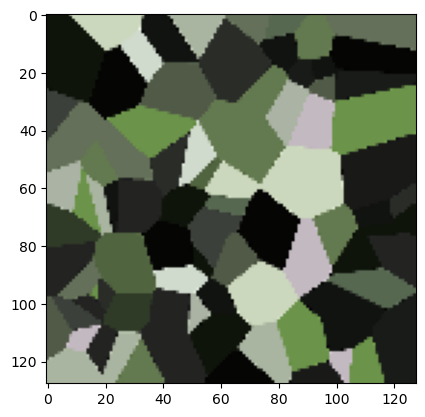

In [128]:
mcv.imshow(img, method='plt', bands=(8,11,6))
plt.show()

In [129]:
mio.load(r'ideal_norm_df.pkl')

,Band_0,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,...,Band_21,Band_22,Band_23,Band_24,Band_25,Band_26,Band_27,Band_28,Band_29,Band_30
288,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
289,0.008555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
290,0.016964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
291,0.025082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
292,0.032772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.277173e-02
909,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.508240e-02
910,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.696390e-02
911,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.555139e-03


In [136]:
import os.path as op
import shutil

In [ ]:
shutil.copyfile()

In [142]:
src = r'E:\GitHub\Meta-FM-SR-Pytorch\datasets\arti_val'
dst = r'D:\Dataset\Multispectral\Final_Dataset_Pack\arti_val'
shutil.copyfile(op.join(src, 'config.json'), op.join(dst, 'config.json'))

dst = op.join(dst, 'data')
os.makedirs(dst, exist_ok=True)

paths = glob.glob(op.join(src,'data','*'))

for path in paths:
    name = op.split(path)[-1]
    new_path = op.join(dst, name)
    if op.isfile(path):
        shutil.copyfile(path, new_path)
    else:
        os.mkdir(new_path)
        shutil.copyfile(op.join(path, '4x.pkl'), op.join(new_path, '4x.pkl'))
        shutil.copyfile(op.join(path, '8x.pkl'), op.join(new_path, '8x.pkl'))

# 20210610

In [55]:
print(img.shape)


new_dim=get_new_dim(img)
new_img = cv2.resize(img, new_dim)
print(new_img.shape)
mcv.imshow(new_img)
plt.show()

AttributeError: 'tuple' object has no attribute 'shape'

In [25]:
import os
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import warnings
import cv2

warnings.filterwarnings('ignore')

img_file = 'ignore/test.png'

In [35]:
# k-means中的k值，即选择几个中心点
k = 5

# 读图片
# img = io.imread(img_file)

img = np.random.rand(200,200,13)

# 转换数据维度
img_ori_shape = img.shape
img1 = img.reshape((img_ori_shape[0] * img_ori_shape[1], img_ori_shape[2]))
img_shape = img1.shape

# 获取图片色彩层数
n_channels = img_shape[1]

estimator = KMeans(n_clusters=k, max_iter=100, init='k-means++', n_init=50)  # 构造聚类器
estimator.fit(img1)  # 聚类
centroids = estimator.cluster_centers_  # 获取聚类中心

In [36]:
colorLabels = list(estimator.labels_)
colorInfo = {}
for center_index in range(k):
    colorRatio = colorLabels.count(center_index)/len(colorLabels)
    colorInfo[colorRatio] = centroids[center_index]

# 根据比例排序，从高至第低
colorInfo = [(k,colorInfo[k]) for k in sorted(colorInfo.keys(), reverse=True)] 
for color in colorInfo:
    print('比例：', color[0], '颜色：', color[1])
    
    
# 使用算法跑出的中心点，生成一个矩阵，为数据可视化做准备
result = []
result_width = 200
result_height_per_center = 80
for center_index in range(k):
    result.append(np.full((result_width * result_height_per_center, n_channels), colorInfo[center_index][1], dtype=int))
result = np.array(result)
result = result.reshape((result_height_per_center * k, result_width, n_channels))

# 保存图片
io.imsave(os.path.splitext(img_file)[0] + '_result.bmp', result)

比例： 0.209825 颜色： [0.52755884 0.48909247 0.48214722 0.75974732 0.21757913 0.49413248
 0.53236912 0.49875694 0.49478277 0.50769009 0.52781976 0.52031065
 0.49535585]
比例： 0.204375 颜色： [0.62109547 0.4895325  0.49149183 0.25762239 0.39453713 0.49745612
 0.24244048 0.49794058 0.48793827 0.48187946 0.49123221 0.46889652
 0.51691324]
比例： 0.19765 颜色： [0.30938786 0.50919345 0.49976681 0.26252822 0.45771481 0.47241181
 0.74098752 0.49242997 0.53289332 0.49574825 0.4861849  0.51130468
 0.47638174]
比例： 0.197425 颜色： [0.771661   0.48212165 0.51705644 0.56358063 0.74246541 0.53408053
 0.64704371 0.48476746 0.50231501 0.49350199 0.47571103 0.50678623
 0.48662735]
比例： 0.190725 颜色： [0.26446464 0.51955356 0.503821   0.65571222 0.72209791 0.50236336
 0.34033316 0.52462879 0.49138194 0.51512557 0.50793514 0.51163539
 0.52384284]


ValueError: Image must be 2D (grayscale, RGB, or RGBA).

In [129]:
random.randint(1,10)

4

In [137]:
def get_new_dim(img, long_edge=300):
    h, w, c = img.shape
    if h<c or w<c:
        img = img.transpose(1,2,0)
        h, w, c = img.shape
    if h<=short_edge and w<=short_edge:
        return (w, h)
    if h>=w:
        dim = (int(w*long_edge/h), long_edge)
        return dim
    else:
        dim = (long_edge, int(h*long_edge/w))
        return dim

def get_new_dim_img(img, long_edge=300, down_sample='crop'):
    assert down_sample in ('crop', 'resize')
    h, w, c = img.shape
    if h<c or w<c:
        img = img.transpose(1,2,0)
        h, w, c = img.shape
    if h<=long_edge or w<=long_edge:
        return img
    
    if down_sample == 'resize':
        if h>=w:
            dim = (int(w*long_edge/h), long_edge)
            return cv2.resize(img, dim)
        else:
            dim = (long_edge, int(h*long_edge/w))
            return cv2.resize(img, dim)    
    elif down_sample == 'crop':
        h0 = random.randint(0, h-long_edge)
        w0 = random.randint(0, w-long_edge)
        img1 = img[h0:h0+long_edge, w0:w0+long_edge,:]
        return img1

def get_main_color(img, k=10, max_iter=100, save_color_map=False, save_path=None):
    # 转换数据维度
    img_ori_shape = img.shape
    img1 = img.reshape((img_ori_shape[0] * img_ori_shape[1], img_ori_shape[2]))
    img1 = img1[img1.sum(axis=1)!=0,:]

    img_shape = img1.shape

    # 获取图片色彩层数
    n_channels = img_shape[1]

    estimator = KMeans(n_clusters=k, max_iter=100, init='k-means++', n_init=50)  # 构造聚类器
    estimator.fit(img1)  # 聚类
    centroids = estimator.cluster_centers_  # 获取聚类中心

    colorLabels = list(estimator.labels_)
    colorInfo = {}
    for center_index in range(k):
        colorRatio = colorLabels.count(center_index)/len(colorLabels)
        colorInfo[colorRatio] = centroids[center_index]

    # 根据比例排序，从高至第低
    colorInfo = [colorInfo[k] for k in sorted(colorInfo.keys(), reverse=True)] 

    if save_color_map:
        # 使用算法跑出的中心点，生成一个矩阵，为数据可视化做准备
        result = []
        result_width = 100
        result_height_per_center = 20
        for center_index in range(k):
            result.append(np.full((result_width * result_height_per_center, n_channels), colorInfo[center_index], dtype=int))
        result = np.array(result)
        result = result.reshape((result_height_per_center * k, result_width, n_channels))

        # 保存图片
        io.imsave(os.path.splitext(save_path, result))
    return colorInfo

In [149]:
img = mio.load(r'L:\Satellite\synthetic_sentinel_real\voronoi1024_23\64x.pkl')
img=get_new_dim_img(img)
print(img.shape)

(300, 300, 12)


In [150]:
materials_array = get_main_color(img, k=20)

In [151]:
from utils import voronoi

In [152]:
vo_img = voronoi(100, 100, 50, materials_array, band_num=12)

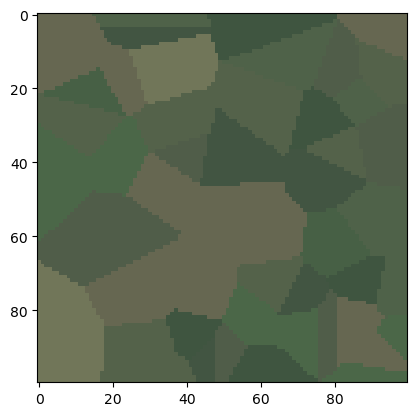

In [153]:
mcv.imshow(vo_img, multiply=30)
plt.show()

In [86]:
img1=np.array(
    [[0,1,2,3,0,3,2,0],
     [0,3,4,2,1,0,0,0]]
)

In [99]:
img1=np.random.randint(0,2,(10,3))

In [123]:
random.randrange(3,10)

8

In [100]:
img1[img1.sum(axis=1)!=0,:]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 0, 1],
       [1, 1, 0]])

In [90]:
img1[:,img1.sum(axis=0)!=0]

array([[1, 2, 3, 0, 3, 2],
       [3, 4, 2, 1, 0, 0]])

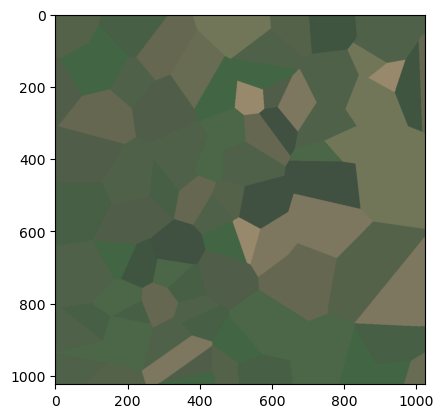

In [159]:
imgg = mio.load(r'L:\Satellite\synthetic_sentinel_real\voronoi1024_43\64x.pkl')
mcv.imshow(imgg, multiply=30)
plt.show()

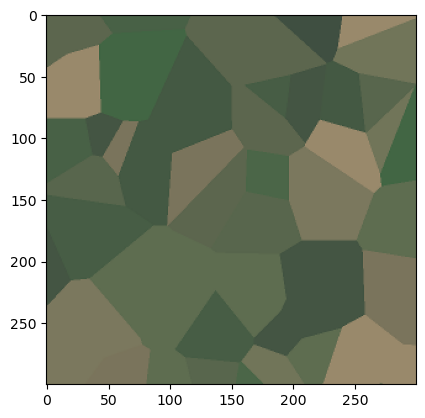

In [148]:
mcv.imshow(get_new_dim_img(imgg, long_edge=300, down_sample='crop'), multiply=30)
plt.show()